In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [79]:
df = pd.read_csv(r"C:\Users\Yagnesh Narola\Documents\Coding Languages\Artificial Intelligence\Codings\Top Rated Movies.csv")

In [80]:
scaler = StandardScaler()
dtr = DecisionTreeRegressor()
model = RandomForestRegressor(n_estimators = 150)
linear = LinearRegression()
linear2 = LinearRegression()
poly = PolynomialFeatures(degree = 3)
rd = Ridge()
ls = Lasso()
df2 = df.copy()

In [81]:
df2.isnull().sum()

id              0
title           0
overview        0
release_date    2
popularity      0
vote_average    0
vote_count      0
dtype: int64

In [82]:
df2

,id,title,overview,release_date,popularity,vote_average,vote_count
0,278,The Shawshank Redemption,Imprisoned in the 1940s for the double murder ...,1994-09-23,5.522,8.708,27883
1,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,5.317,8.689,21151
2,240,The Godfather Part II,In the continuing saga of the Corleone crime f...,1974-12-20,4.747,8.570,12771
3,424,Schindler's List,The true story of how businessman Oskar Schind...,1993-12-15,4.457,8.567,16219
4,1356039,Counterattack,When a hostage rescue mission creates a new en...,2025-02-27,9.430,8.524,431
...,...,...,...,...,...,...,...
8555,291264,The Family Fang,A brother and sister return to their family ho...,2016-04-16,3.535,5.800,329
8556,250349,Barbecue,"On his 50th birthday, a man who's been watchin...",2014-04-30,3.829,5.834,699
8557,150202,The Haunting in Connecticut 2: Ghosts of Georgia,A young family moves into a historic home in G...,2013-02-01,3.533,5.800,520
8558,4942,Leatherheads,A light hearted comedy about the beginnings of...,2008-03-24,3.532,5.800,457


In [83]:
df2 = df2.drop(columns = ['id','title','overview'])

In [84]:
df2

,release_date,popularity,vote_average,vote_count
0,1994-09-23,5.522,8.708,27883
1,1972-03-14,5.317,8.689,21151
2,1974-12-20,4.747,8.570,12771
3,1993-12-15,4.457,8.567,16219
4,2025-02-27,9.430,8.524,431
...,...,...,...,...
8555,2016-04-16,3.535,5.800,329
8556,2014-04-30,3.829,5.834,699
8557,2013-02-01,3.533,5.800,520
8558,2008-03-24,3.532,5.800,457


In [85]:
df2['release_date'] = pd.to_datetime(df2['release_date'])
df2

,release_date,popularity,vote_average,vote_count
0,1994-09-23,5.522,8.708,27883
1,1972-03-14,5.317,8.689,21151
2,1974-12-20,4.747,8.570,12771
3,1993-12-15,4.457,8.567,16219
4,2025-02-27,9.430,8.524,431
...,...,...,...,...
8555,2016-04-16,3.535,5.800,329
8556,2014-04-30,3.829,5.834,699
8557,2013-02-01,3.533,5.800,520
8558,2008-03-24,3.532,5.800,457


In [86]:
df2['Release_Year'] = df2['release_date'].dt.day
df2['Release_Date'] = df2['release_date'].dt.year
df2['Release_Month'] = df2['release_date'].dt.month
df2 = df2.drop(columns = 'release_date')

In [87]:
df2

,popularity,vote_average,vote_count,Release_Year,Release_Date,Release_Month
0,5.522,8.708,27883,23.0,1994.0,9.0
1,5.317,8.689,21151,14.0,1972.0,3.0
2,4.747,8.570,12771,20.0,1974.0,12.0
3,4.457,8.567,16219,15.0,1993.0,12.0
4,9.430,8.524,431,27.0,2025.0,2.0
...,...,...,...,...,...,...
8555,3.535,5.800,329,16.0,2016.0,4.0
8556,3.829,5.834,699,30.0,2014.0,4.0
8557,3.533,5.800,520,1.0,2013.0,2.0
8558,3.532,5.800,457,24.0,2008.0,3.0


<Axes: >

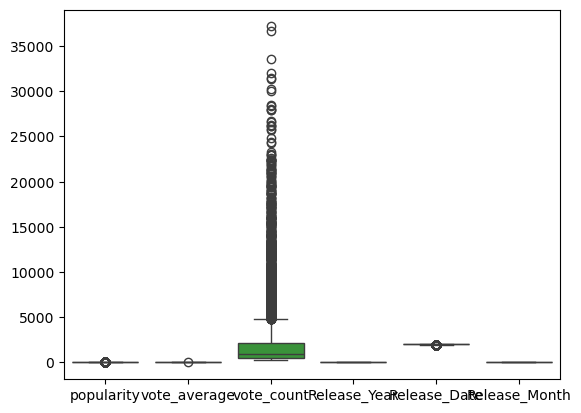

In [88]:
sns.boxplot(df2)

In [89]:
def Outliers(df,columns):
    for i in columns:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3 - q1
        upperlimit = q3 + (1.5 * iqr)
        lowerlimit = q1 - (1.5 * iqr)
        df.loc[df[i] > upperlimit, i] = upperlimit
        df.loc[df[i] < lowerlimit, i] = lowerlimit
    return df
cols = ['popularity', 'vote_average', 'vote_count', 'Release_Year',
       'Release_Date', 'Release_Month']
df2 = Outliers(df2,cols)

C:\Users\Yagnesh Narola\AppData\Local\Temp\ipykernel_13824\2816602771.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4763.125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[i] > upperlimit, i] = upperlimit


In [90]:
df2['Release_Date'] = df2['Release_Date'].fillna(df2['Release_Date'].median())
df2['Release_Year'] = df2['Release_Year'].fillna(df2['Release_Year'].median())
df2['Release_Month'] = df2['Release_Year'].fillna(df2['Release_Year'].median())

In [91]:
df2.columns

Index(['popularity', 'vote_average', 'vote_count', 'Release_Year',
       'Release_Date', 'Release_Month'],
      dtype='object')

In [105]:
df2.isnull().sum()

popularity       0
vote_average     0
vote_count       0
Release_Year     0
Release_Date     0
Release_Month    0
dtype: int64

<Axes: >

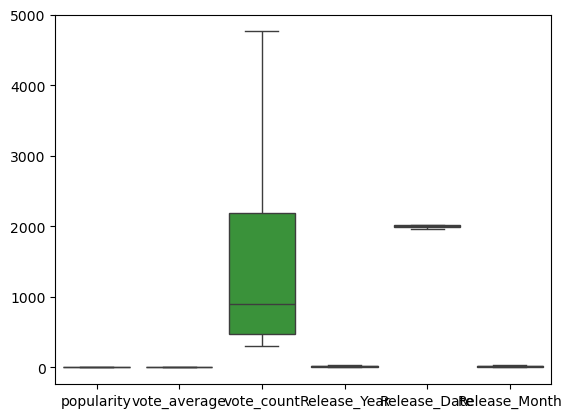

In [93]:
sns.boxplot(df2)

In [106]:
x = df2.drop(columns = 'popularity')
y = df2['popularity']

In [107]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state = 70,test_size = 30)

In [108]:
scaler.fit(xtrain)
xtrainscaled = scaler.transform(xtrain)
xtestscaled = scaler.transform(xtest)

In [124]:
linear.fit(xtrainscaled,ytrain)
linears = linear.score(xtestscaled,ytest)

In [110]:
poly.fit(xtrain)
xtrainpoly = poly.transform(xtrain)
xtestpoly = poly.transform(xtest)

In [123]:
linear2.fit(xtrainpoly,ytrain)
polys = linear2.score(xtestpoly,ytest)

In [119]:
rd.fit(xtrainscaled,ytrain)
rds = rd.score(xtestscaled,ytest)

In [120]:
ls.fit(xtrainscaled,ytrain)
lss = ls.score(xtestscaled,ytest)

In [121]:
dtr.fit(xtrainscaled,ytrain)
dtrs = dtr.score(xtestscaled,ytest)

In [122]:
model.fit(xtrainscaled,ytrain)
rfrs = model.score(xtestscaled,ytest)

In [125]:
print("Regression Model Scores:")
print("LinearRegression",linears)
print("PolynomialFeatures",polys)
print("Ridge",rds)
print("Lasso",lss)
print("DecisionTreeRegressor",dtrs)
print("RandomForestRegressor",rfrs)

Regression Model Scores:
LinearRegression 0.4978601827392164
PolynomialFeatures 0.41080784251725433
Ridge 0.4978582064454382
Lasso -0.003766630975921892
DecisionTreeRegressor -0.504756200943778
RandomForestRegressor 0.3949463794519231
